In [6]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [7]:
df = pd.read_csv(r'C:\Users\User\Downloads\imdb-movies-dataset.csv', encoding='ISO-8859-1')
df

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://m.media-amazon.com/images/M/MV5BMzg5MW...,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?"
9996,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020.0,NaN,76.0,"Animation, Action, Adventure",7.5,NaN,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...","14,300",A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga
9997,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,Is-slottet,2020.0,NaN,78.0,"Mystery, Drama",6.5,NaN,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film
9998,https://m.media-amazon.com/images/M/MV5BMTAwOD...,Loving Pablo,2020.0,A,123.0,"Biography, Crime, Drama",6.4,42.0,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...","22,447",A journalist strikes up a romantic relationshi...,84,That film should be in Spanish


In [11]:
#top 20 movies based on rating in the dataset
df1 = df.sort_values(by = 'Rating', ascending = False)
df1[['Title', 'Rating', 'Genre']].head(20)

,Title,Rating,Genre
6401,August,9.7,Documentary
9031,Just Now Jeffrey,9.5,Comedy
9412,Los Frikis,9.5,Drama
71,The Shawshank Redemption,9.3,Drama
55,The Godfather,9.2,"Crime, Drama"
8699,"Men Are from QC, Women Are from Alabang",9.1,Drama
327,12 Angry Men,9.0,"Crime, Drama"
125,Schindler's List,9.0,"Biography, Drama, History"
106,The Dark Knight,9.0,"Action, Crime, Drama"
116,The Lord of the Rings: The Return of the King,9.0,"Action, Adventure, Drama"


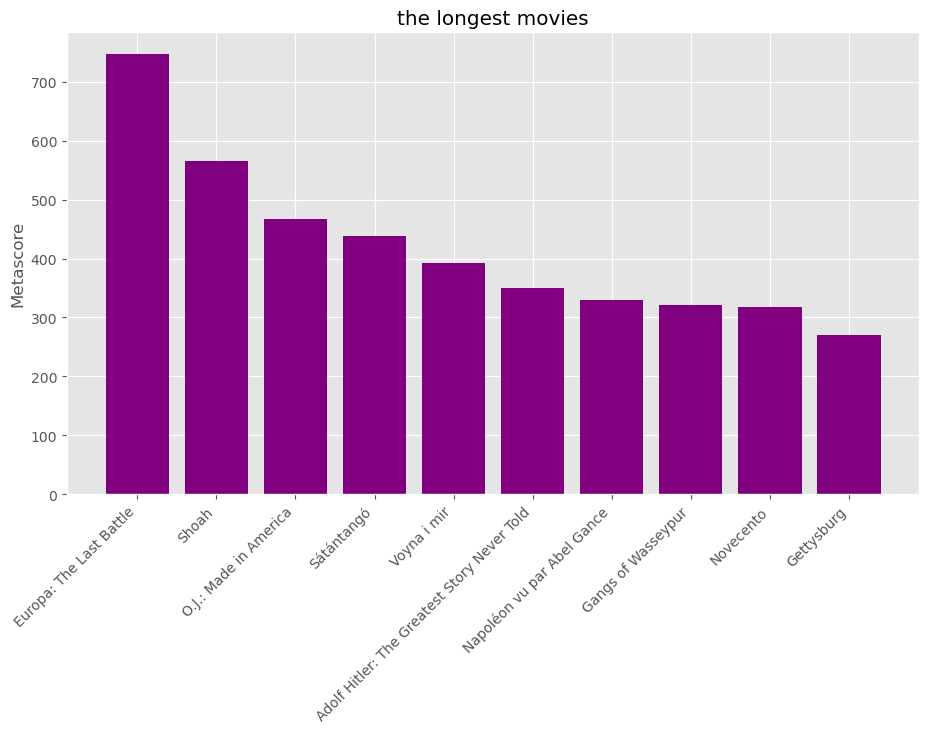

In [19]:
#Now create a bar chart to show the longest movies (to avoid)
df2 = df.sort_values(by = 'Duration (min)', ascending= False)
df3 = df2.head(10)
plt.figure(figsize=(11, 6))
plt.bar(df3['Title'], df3['Duration (min)'], color = 'Purple')
plt.ylabel('Metascore')
plt.title('the longest movies')
plt.xticks(rotation=45, ha='right')
plt.show()

#looks like we ain't watching the Hitler one.

In [40]:
#Hidden Gems
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df = df.dropna(subset=['Rating', 'Votes'])
popularity_threshold = df['Votes'].quantile(0.25) 
rating_threshold = df['Rating'].median() 
filtered_df = df[(df['Votes'] <= popularity_threshold) & (df['Rating'] >= rating_threshold)]
sorted_filtered_df = filtered_df.sort_values(by='Rating', ascending=False)
df.head(5)

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title
11,https://m.media-amazon.com/images/M/MV5BNmYzMW...,Furiosa: A Mad Max Saga,2023.0,R,148.0,"Action, Adventure, Sci-Fi",8.3,83.0,George Miller,"Anya Taylor-Joy, Chris Hemsworth, Charlee Fras...",259.0,The origin story of renegade warrior Furiosa b...,3,Being vastly overrated at this point
17,https://m.media-amazon.com/images/M/MV5BYWQ4OG...,IF,2023.0,PG,104.0,"Animation, Comedy, Drama",6.8,NaN,John Krasinski,"Cailey Fleming, Ryan Reynolds, John Krasinski,...",906.0,A young girl who goes through a difficult expe...,15,30 year old male perspective
63,https://m.media-amazon.com/images/M/MV5BMDRkMD...,In a Violent Nature,2023.0,NaN,94.0,"Drama, Horror, Thriller",5.7,65.0,Chris Nash,"Ry Barrett, Andrea Pavlovic, Cameron Love, Ree...",246.0,When a locket is removed from a collapsed fire...,1,The Slasher of Graphic
75,https://m.media-amazon.com/images/M/MV5BNDVkZT...,The Strangers: Chapter 1,2023.0,R,91.0,Horror,6.4,NaN,Renny Harlin,"Madelaine Petsch, Ryan Bown, Matus Lajcak, Oli...",91.0,After their car breaks down in an eerie small ...,4,This movie was so good!
93,https://m.media-amazon.com/images/M/MV5BMjcyZj...,I Saw the TV Glow,2023.0,PG-13,100.0,"Drama, Horror",6.6,83.0,Jane Schoenbrun,"Justice Smith, Brigette Lundy-Paine, Ian Forem...",933.0,Two teenagers bond over their love of a supern...,6,What a huge pile of Garbage


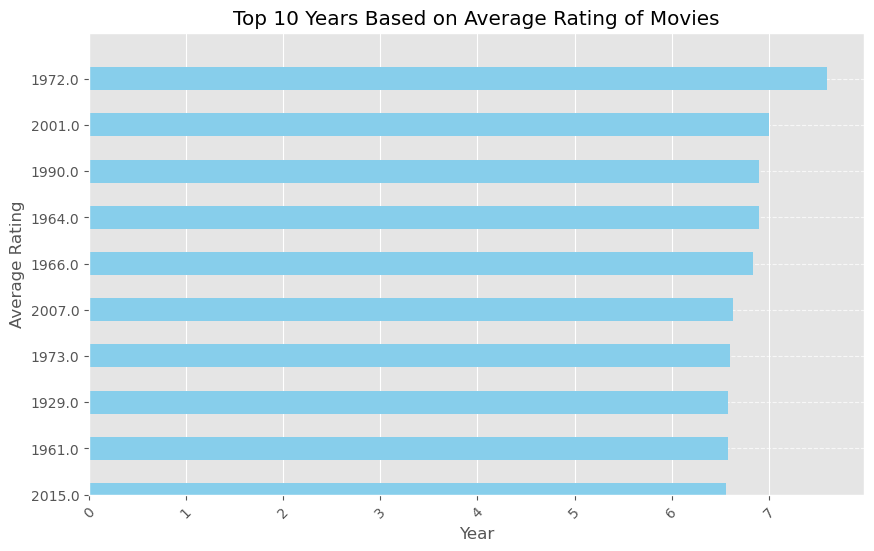

In [71]:
#most intense year for the movie industry
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])
average_ratings_by_year = df.groupby('Year')['Rating'].mean()
top_10_years = average_ratings_by_year.nlargest(10)
plt.figure(figsize=(10, 6))
top_10_years.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))
plt.title('Top 10 Years Based on Average Rating of Movies')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.ylim(0, 10) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
